In [1]:
#Importing Libraries

import pandas as pd  
import numpy as np
%matplotlib inline
import seaborn as sns  #for data visualisation
import matplotlib.pyplot as plt #for plotting

In [132]:
#Read dataset

df=pd.read_csv("/Users/tusharnema/Desktop/Datasets/Melbourne_housing.csv")

In [3]:
#Looking at data types
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [6]:
#Looking for features
df.columns.values

array(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname', 'Propertycount'],
      dtype=object)

In [7]:
#looking for head of the table
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [8]:
df["Date"] = pd.to_datetime(df["Date"],dayfirst=True)

In [86]:
dropped_df=df.dropna().head()

In [14]:

len(df["Date"].unique())/4  #12 is 1 year of data

19.5

In [15]:
var = df[df["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").std()
count = df[df["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").count()
mean = df[df["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").mean()

In [18]:
mean.head()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Date,,,,,,,,,,,,,
2016-01-28,3.500000,1.205000e+06,10.100000,3126.500000,3.500000,1.500000,1.000000,649.000000,198.000000,1910.000000,-37.829800,145.087850,4361.000000
2016-02-04,2.958333,1.068888e+06,10.245833,3091.083333,2.842105,1.368421,1.842105,484.947368,126.333333,1963.076923,-37.834721,144.997153,5622.791667
2016-04-16,3.271552,1.224499e+06,8.964655,3091.806034,3.089947,1.645503,1.645503,481.984127,154.068376,1942.500000,-37.803719,144.989346,7363.405172
2016-04-23,3.181818,1.087059e+06,8.721818,3078.445455,3.034483,1.459770,1.528736,908.218391,145.666667,1941.431373,-37.784748,144.975782,7364.154545
2016-05-07,3.279152,1.285205e+06,8.995760,3099.922261,3.164502,1.627706,1.670996,553.207792,166.137931,1945.369427,-37.816396,144.997093,7151.759717


In [19]:
count.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
Date,,,,,,,,,,,,,,,,,,,,
2016-01-28,2,2,2,2,1,2,2,2,2,2,2,2,2,1,1,2,2,2,2,2
2016-02-04,24,24,24,24,20,24,24,24,24,19,19,19,19,12,13,24,19,19,24,24
2016-04-16,232,232,232,232,185,232,232,232,232,189,189,189,189,117,132,232,190,190,232,232
2016-04-23,110,110,110,110,88,110,110,110,110,87,87,87,87,48,51,110,87,87,110,110
2016-05-07,283,283,283,283,200,283,283,283,283,231,231,231,231,145,157,283,233,233,283,283


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


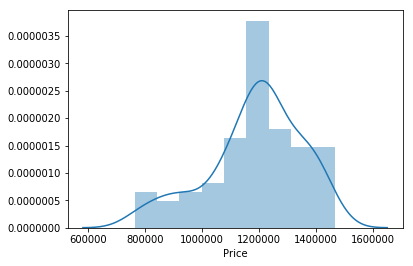

In [31]:
#Distribution Plot
sns.distplot(mean.Price)
plt.show()

In [21]:
#We can actually define colors for each feature on the x axis

pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

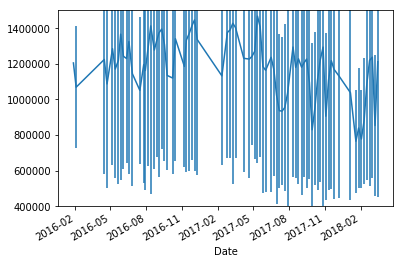

In [26]:
mean["Price"].plot(yerr=var["Price"],ylim=(400000,1500000))
plt.show()

In [28]:
means = df[(df["Type"]=="h") & (df["Distance"]<13)].sort_values("Date", ascending=False).groupby("Date").mean()
errors = df[(df["Type"]=="h") & (df["Distance"]<13)].sort_values("Date", ascending=False).groupby("Date").std()

In [29]:
means.columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')

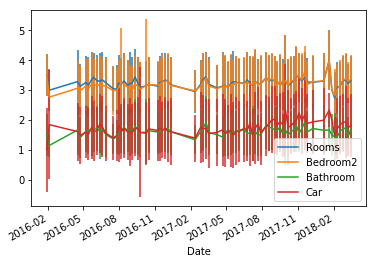

In [39]:
#Removing features not required for mean

means.drop(["Price",
            "Postcode",
            
           "Longtitude","Lattitude",
           "Distance","BuildingArea", "Propertycount","Landsize","YearBuilt"],axis=1).plot(yerr=errors)
#plt.figure(figsize=(20,8))
plt.show()

In [80]:
#Dropna removes Nan rows or columns
pd.set_eng_float_format(accuracy=1, use_eng_prefix=True)
Sub_grp=df[(df["Type"]=="h") & 
          (df["Distance"]<14) &
          (df["Distance"]>13.7)           
         ].sort_values("Date", ascending=False).dropna().groupby(["Suburb","SellerG"]).mean().head()
Sub_grp.head()

Rooms   Price  Distance  Postcode  Bedroom2  Bathroom  \
Suburb SellerG                                                                
Albion Barry            2.3  735.0k      13.9      3.0k       2.3       1.0   
       Bells            3.0  782.0k      13.9      3.0k       3.3       1.3   
       Sweeney          3.0  596.5k      13.9      3.0k       3.0       1.5   
       hockingstuart    3.0  730.0k      13.9      3.0k       3.0       2.0   
Altona Barlow           3.0    1.1M      13.8      3.0k       3.0       1.0   

                      Car  Landsize  BuildingArea  YearBuilt  Lattitude  \
Suburb SellerG                                                            
Albion Barry          1.0     634.3         118.0       1.9k      -37.8   
       Bells          2.3     741.0         126.0       2.0k      -37.8   
       Sweeney        1.5     651.0         106.0       1.9k      -37.8   
       hockingstuart  3.0     628.0         140.0       2.0k      -37.8   
Altona Barlow         2.0     506.0         120.0       1.9k      -37.9   

                      Longtitude  Propertycount  
Suburb SellerG                                   
Albion Barry               144.8           2.2k  
       Bells               144.8           2.2k  
       Sweeney             144.8           2.2k  
       hockingstuart       144.8           2.2k  
Altona Barlow              144.8           5.3k

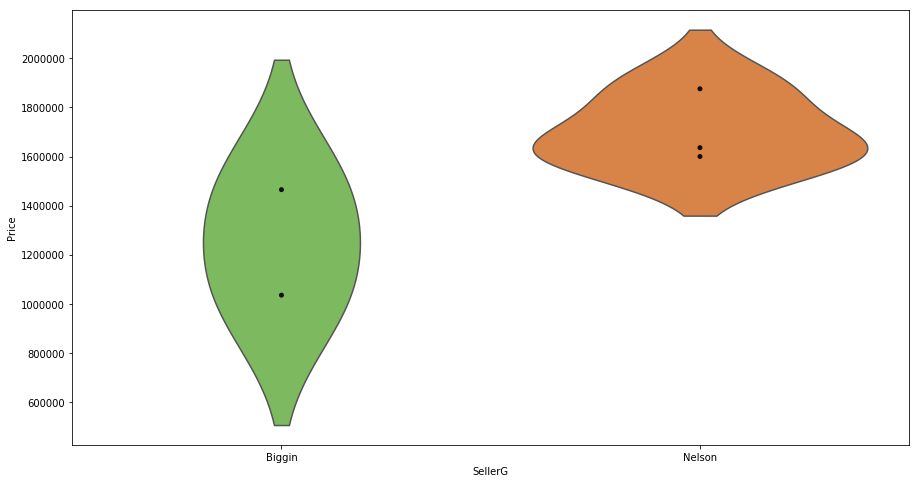

In [98]:
#Mixing the swarm and violet plot
# Set figure size with matplotlib
plt.figure(figsize=(15,8))
 
# Create plot
sns.violinplot(x='SellerG',
               y='Price', 
               data=dropped_df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='SellerG',
               y='Price', 
               data=dropped_df, 
              color='k', # Make points black
              alpha=0.9) # and slightly transparent
 
# Set title with matplotlib
plt.title('')
plt.show()

In [102]:
m=(df[(df["Suburb"]=="Northcote")
         & (df["Type"]=="u")
         & (df["Rooms"] == 2)]["Price"]).dropna()

#print(Price_sub.head())

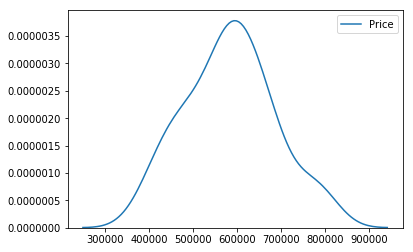

In [103]:
sns.kdeplot(m)
plt.show()

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


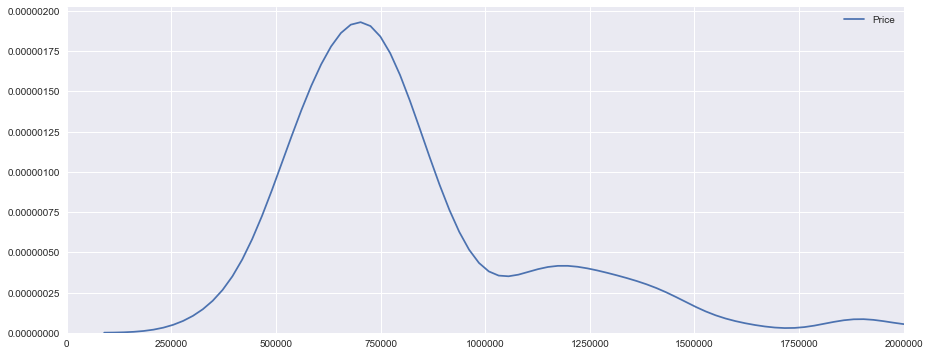

In [117]:
plt.figure(figsize=(15,6))
my_axis = sns.kdeplot(df["Price"][((df["Type"]=="u") &
                                (df["Distance"]>8) &
                                (df["Distance"]<10) &
                                (df["Rooms"] > 2)#&
                                #(dataframe["Price"] < 1000000)
                               )])
my_axis.axis(xmin=0, xmax=2000000)
plt.show()

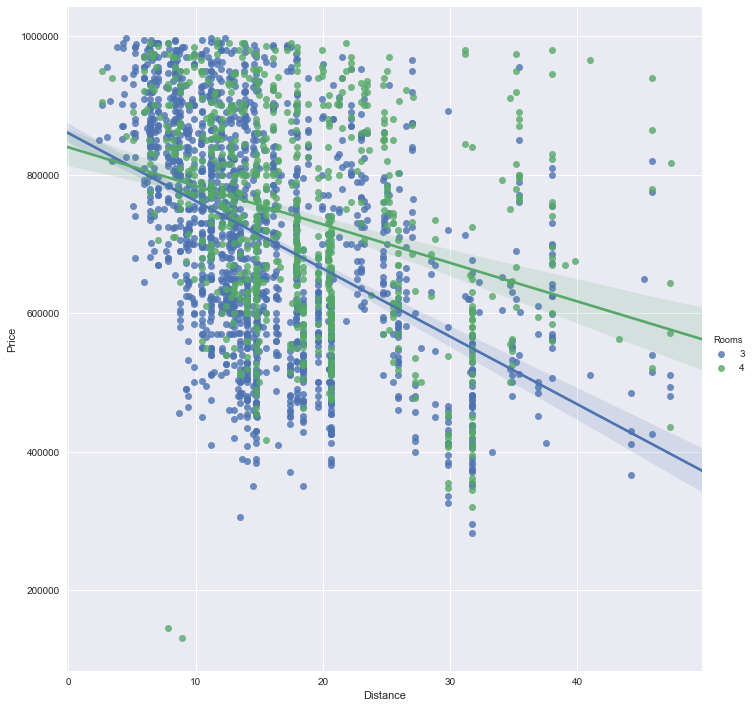

In [118]:
sns.lmplot("Distance","Price",df[(df["Rooms"]<=4) & 
                                         (df["Rooms"]> 2) & 
                                        (df["Type"]=="h") &
                                        (df["Price"]< 1000000)
                                       ].dropna(),hue="Rooms", size=10)
#sns.set(rc={'figure.figsize':(15.7,3.27)})
plt.show()

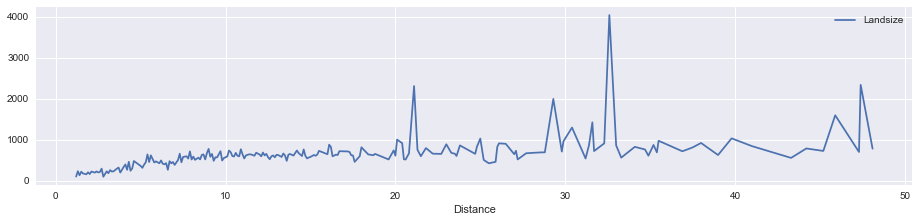

In [123]:
df[(df["Rooms"]>2) & (df["Type"] == "h")& 
   (df["Landsize"] <5000)][["Landsize","Distance"]].dropna().groupby("Distance").mean().plot()
plt.show()


In [144]:
df[['Landsize']].head()


,Landsize
0,126.0
1,202.0
2,156.0
3,0.0
4,134.0


In [149]:
(df["Rooms"]>2).head()

0    False
1    False
2    False
3     True
4     True
Name: Rooms, dtype: bool

In [150]:
df[(df["Rooms"]>2)].head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3.1k,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8,145.0,Northern Metropolitan,4.0k
4,Abbotsford,5 Charles St,3,h,1.5M,SP,Biggin,4/03/2017,2.5,3.1k,...,2.0,0.0,134.0,150.0,1.9k,Yarra City Council,-37.8,145.0,Northern Metropolitan,4.0k
5,Abbotsford,40 Federation La,3,h,850.0k,PI,Biggin,4/03/2017,2.5,3.1k,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.8,145.0,Northern Metropolitan,4.0k
6,Abbotsford,55a Park St,4,h,1.6M,VB,Nelson,4/06/2016,2.5,3.1k,...,1.0,2.0,120.0,142.0,2.0k,Yarra City Council,-37.8,145.0,Northern Metropolitan,4.0k
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3.1k,...,2.0,2.0,400.0,220.0,2.0k,Yarra City Council,-37.8,145.0,Northern Metropolitan,4.0k


In [151]:
df[(df["Rooms"]>2)][['Distance','Landsize']].head()

,Distance,Landsize
3,2.5,0.0
4,2.5,134.0
5,2.5,94.0
6,2.5,120.0
7,2.5,400.0


In [153]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

## Take up every pair and plot against each other ##

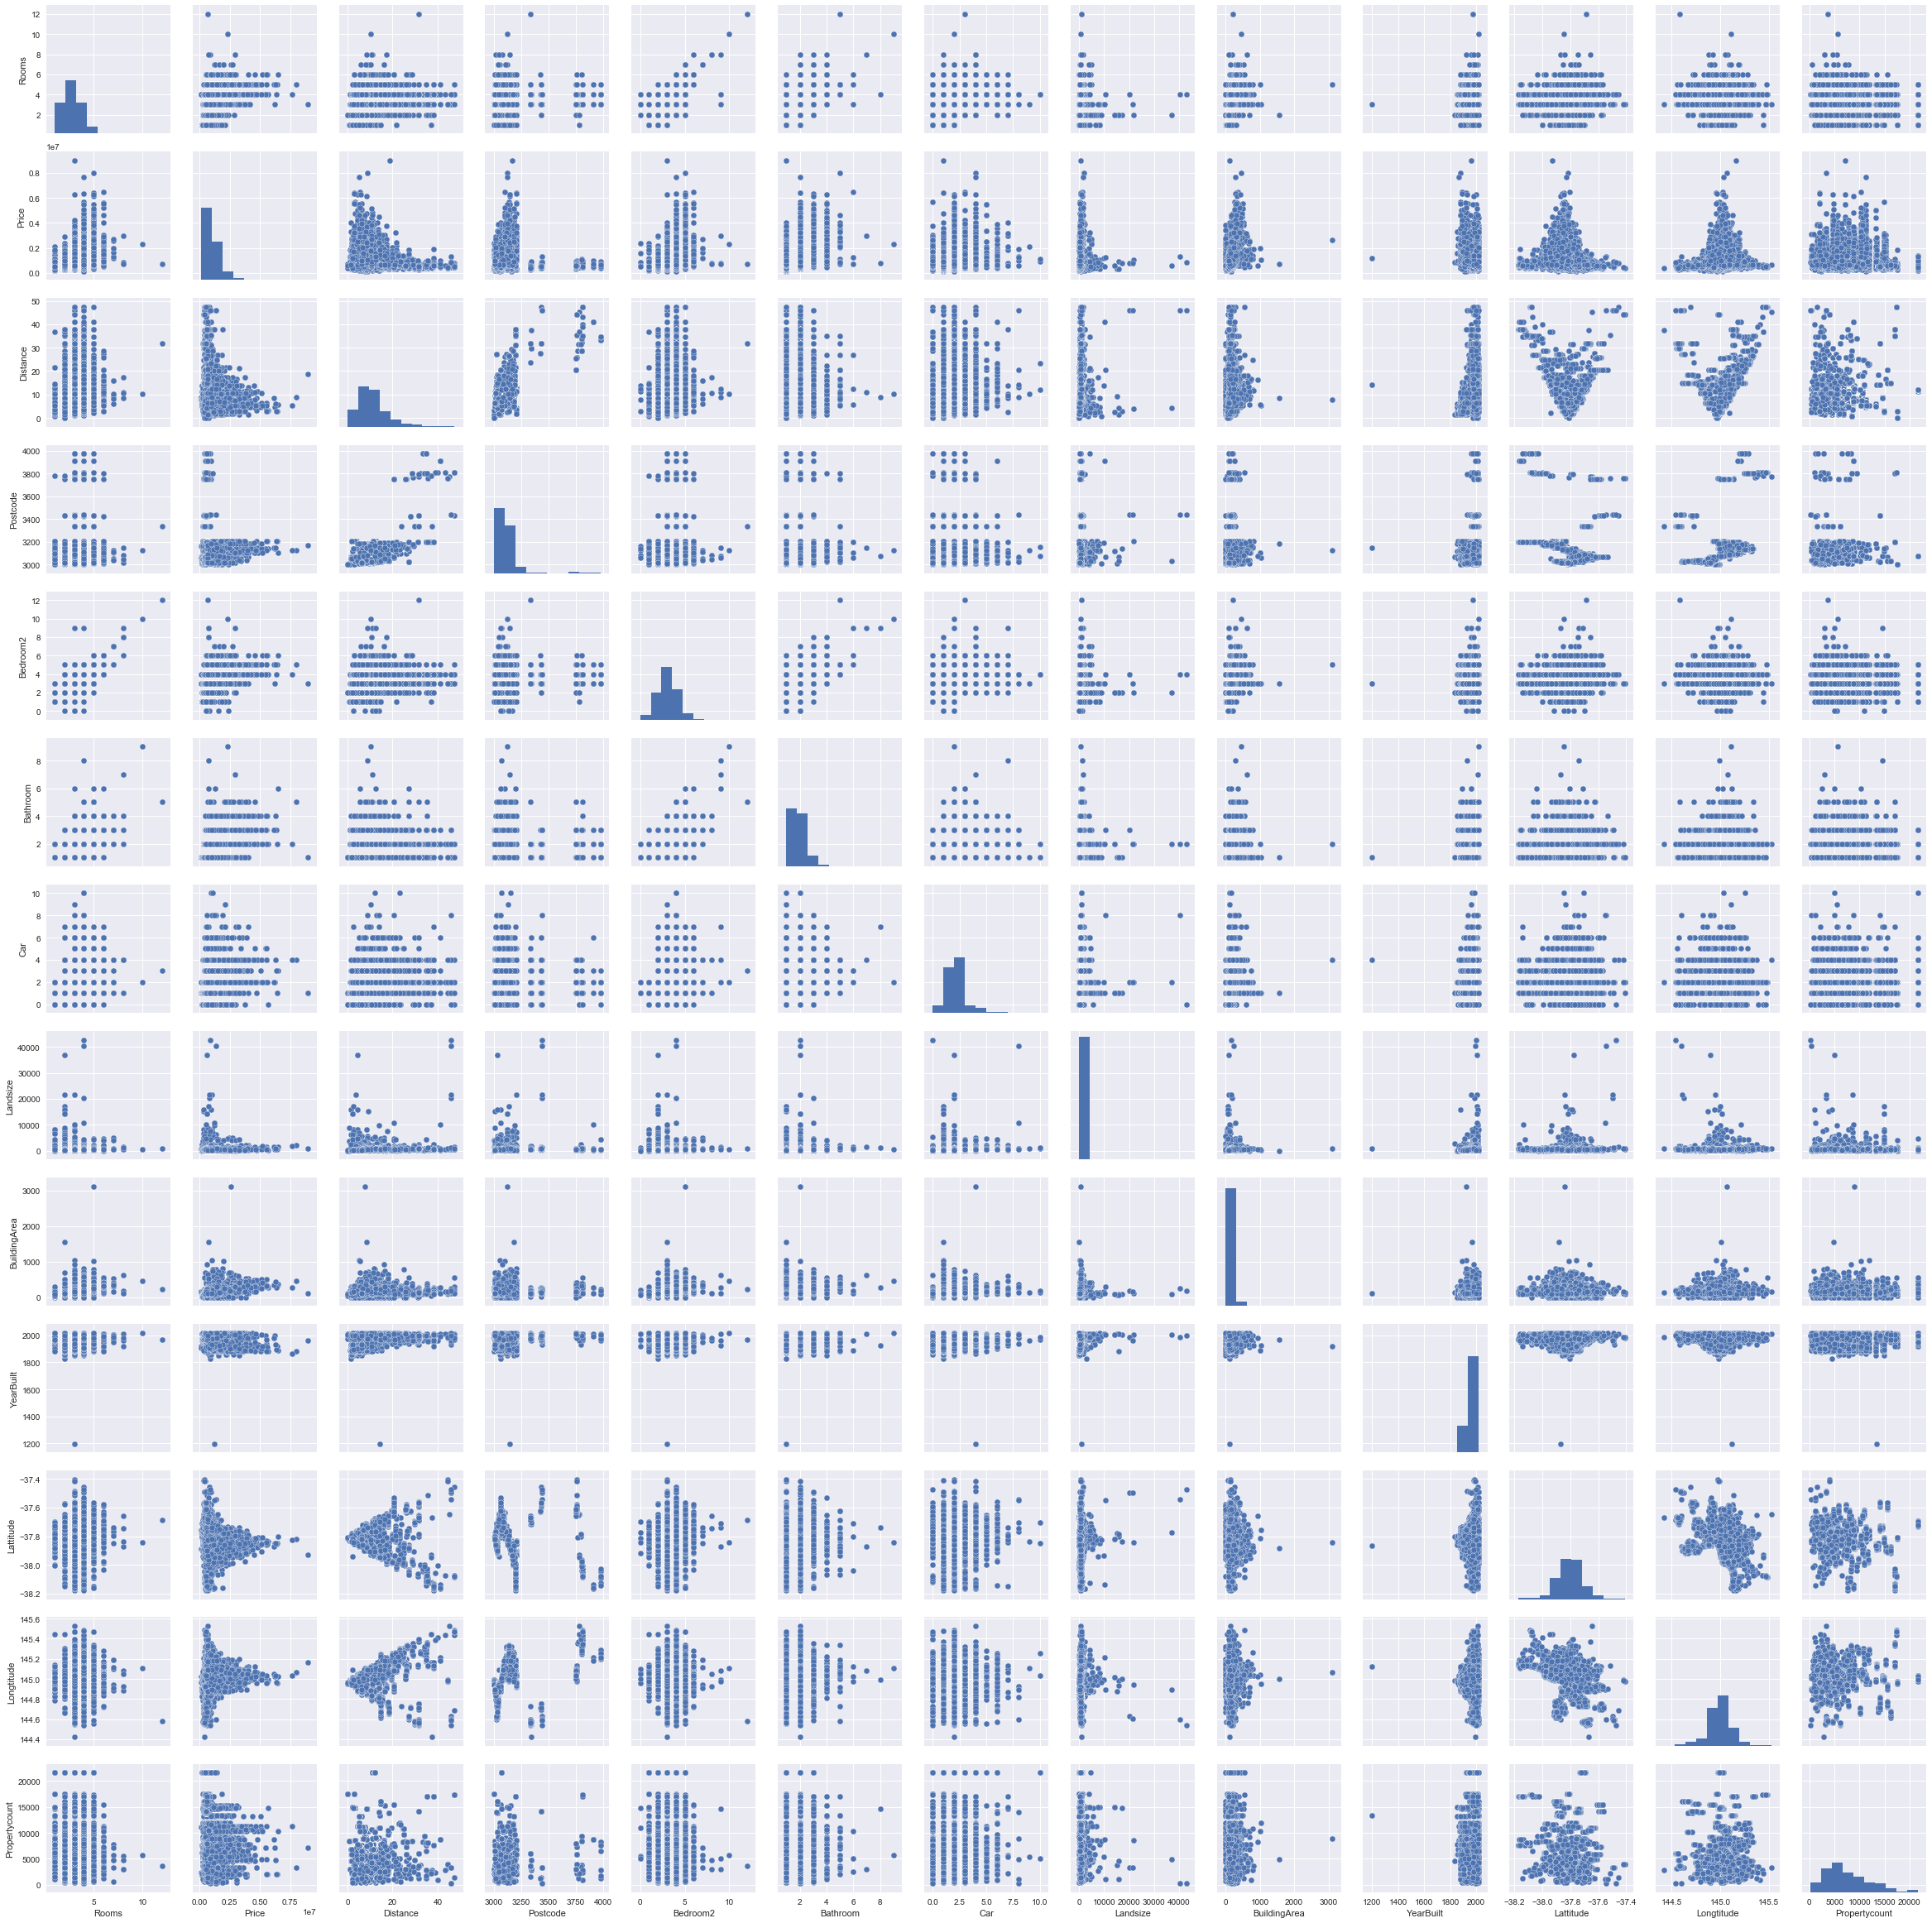

In [154]:
sns.pairplot(df.dropna())

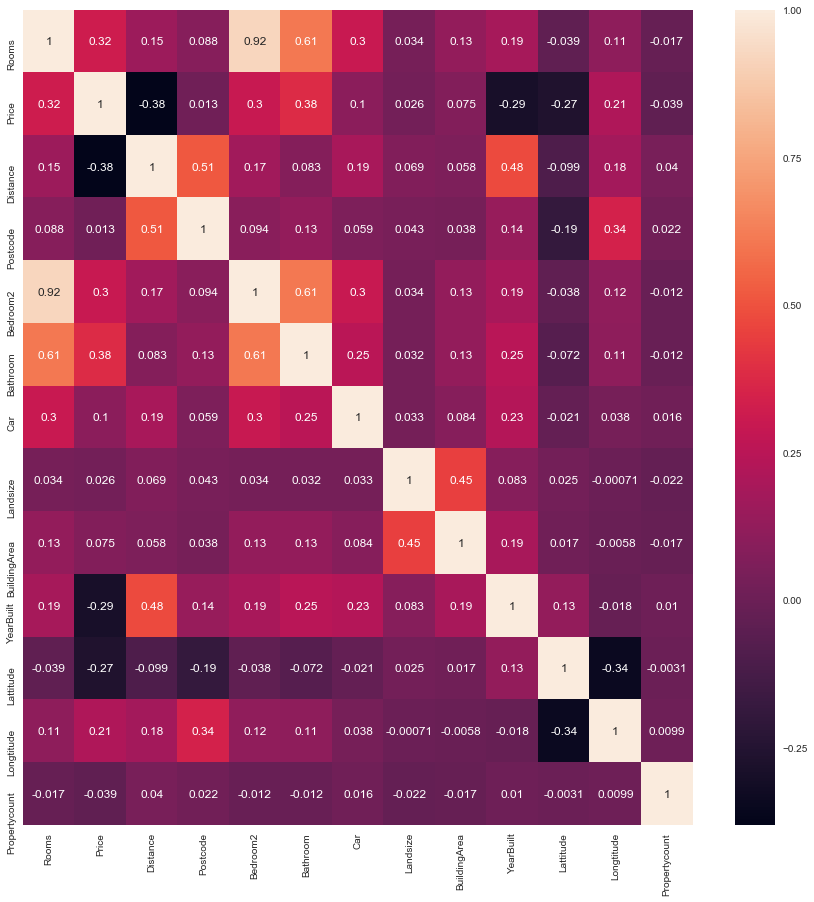

In [156]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(df[df["Type"] == "h"].corr(), annot=True)

In [157]:
from sklearn.cross_validation import train_test_split

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [166]:
df_clean=df.dropna().sort_values('Date')

In [165]:
suburb_dummies = pd.get_dummies(df_clean[["Type", "Method"]])

In [167]:
all_Data = df_clean.drop(["Address","Price","Date", "SellerG","Suburb","Type","Method","CouncilArea","Regionname"],axis=1).join(suburb_dummies)

In [168]:
all_Data.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount,Type_h,Type_t,Type_u,Method_PI,Method_S,Method_SA,Method_SP,Method_VB
14499,3,17.2,3.1k,3.0,1.0,2.0,608.0,138.0,2.0k,-37.8,145.2,6.9k,1,0,0,0,1,0,0,0
14232,3,9.4,3.0k,3.0,1.0,2.0,672.0,110.0,2.0k,-37.8,144.8,5.1k,1,0,0,0,1,0,0,0
14480,3,6.4,3.0k,3.0,2.0,2.0,262.0,153.0,2.0k,-37.8,144.9,3.9k,0,1,0,0,1,0,0,0
14478,1,6.4,3.0k,1.0,1.0,1.0,3.8k,55.0,2.0k,-37.8,144.9,3.9k,0,0,1,0,0,0,0,1
14471,4,16.3,3.1k,4.0,2.0,4.0,544.0,205.0,2.0k,-37.7,145.0,8.3k,1,0,0,0,1,0,0,0


In [171]:
X = all_Data

In [170]:
y = df_clean["Price"]

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [173]:
from sklearn.linear_model import LinearRegression

In [174]:
lr = LinearRegression()



In [177]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [178]:
print(lr.intercept_)

-129265072.34896883


In [180]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])

In [181]:
coeff_df

,Coefficient
Rooms,106.7k
Distance,-43.0k
Postcode,774.9
Bedroom2,4.1k
Bathroom,187.3k
Car,51.2k
Landsize,34.6
BuildingArea,2.1k
YearBuilt,-3.3k
Lattitude,-1.2M


In [182]:
ranked_suburbs = coeff_df.sort_values("Coefficient", ascending = False)
ranked_suburbs

,Coefficient
Longtitude,613.1k
Bathroom,187.3k
Type_h,149.9k
Rooms,106.7k
Car,51.2k
Method_SA,34.5k
Method_S,20.1k
Type_t,11.1k
Method_VB,5.4k
Bedroom2,4.1k


In [183]:
predictions = lr.predict(X_test)

(200000, 1000000)

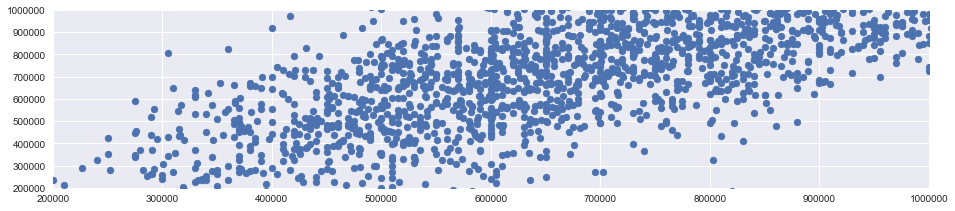

In [184]:
plt.scatter(y_test, predictions)
plt.ylim([200000,1000000])
plt.xlim([200000,1000000])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


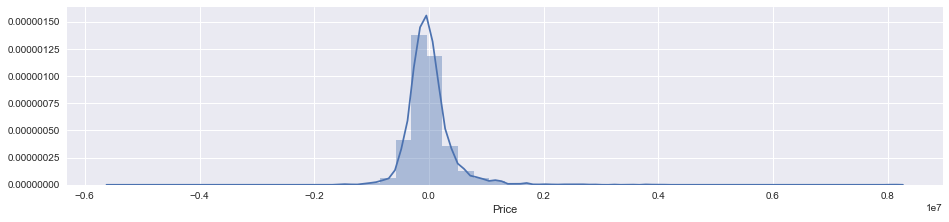

In [185]:
sns.distplot((y_test-predictions),bins=50)

In [186]:
from sklearn import metrics

In [187]:
print("MAE:", metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 261166.64463911156
MSE: 187797353237.91345
RMSE: 433355.91981408704
